In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2024-01-05 11:33:47.812191: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 11:33:47.812210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 11:33:47.812864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 11:33:47.816697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-05 11:33:48.364017: W tensorflow/compiler/tf2

In [2]:
!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1

--2024-01-05 11:33:49--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 2001:1458:d00:9::100:195, 2001:1458:d00:3b::100:200, 2001:1458:d00:3a::100:33a, ...
Connecting to zenodo.org (zenodo.org)|2001:1458:d00:9::100:195|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/4269852/files/dermamnist.npz [following]
--2024-01-05 11:33:50--  https://zenodo.org/records/4269852/files/dermamnist.npz
Reusing existing connection to [zenodo.org]:443.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18,81M  6,70MB/s    in 2,8s    

2024-01-05 11:33:53 (6,70 MB/s) - ‘Data.npz’ saved [19725078/19725078]



In [3]:
data = np.load('Data.npz')
print(data.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [4]:
print(f'Train Set:      X:%s Y:%s' %(data['train_images'].shape, data['train_labels'].shape))
print(f'Validation Set: X:%s Y:%s' %(data['val_images'].shape, data['val_labels'].shape))
print(f'Test Set :      X:%s Y:%s' %(data['test_images'].shape, data['test_labels'].shape))

Train Set:      X:(7007, 28, 28, 3) Y:(7007, 1)
Validation Set: X:(1003, 28, 28, 3) Y:(1003, 1)
Test Set :      X:(2005, 28, 28, 3) Y:(2005, 1)


In [5]:
X_train = data['train_images']
X_val = data['val_images']
X_test = data['test_images']
X = np.concatenate((X_train, X_val, X_test), axis=0)

y_train = data['train_labels']
y_val = data['val_labels']
y_test = data['test_labels']
y = np.concatenate((y_train, y_val, y_test), axis=0)

In [6]:
labels = ['akiec',
          'bcc',
          'bkl',
          'df',
          'nv',
          'vasc',
          'mel']

In [7]:
lesion_type_dict = {
    'akiec': 'Actinic keratoses',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions ',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions',
    'mel': 'Melanoma'
}


In [8]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

In [9]:
num_classes = []
for i in range(len(labels)):
  num_classes.append(len(np.where(y==i)[0]))

pd.DataFrame(num_classes,index=labels)

,0
akiec,327
bcc,514
bkl,1099
df,115
nv,1113
vasc,6705
mel,142


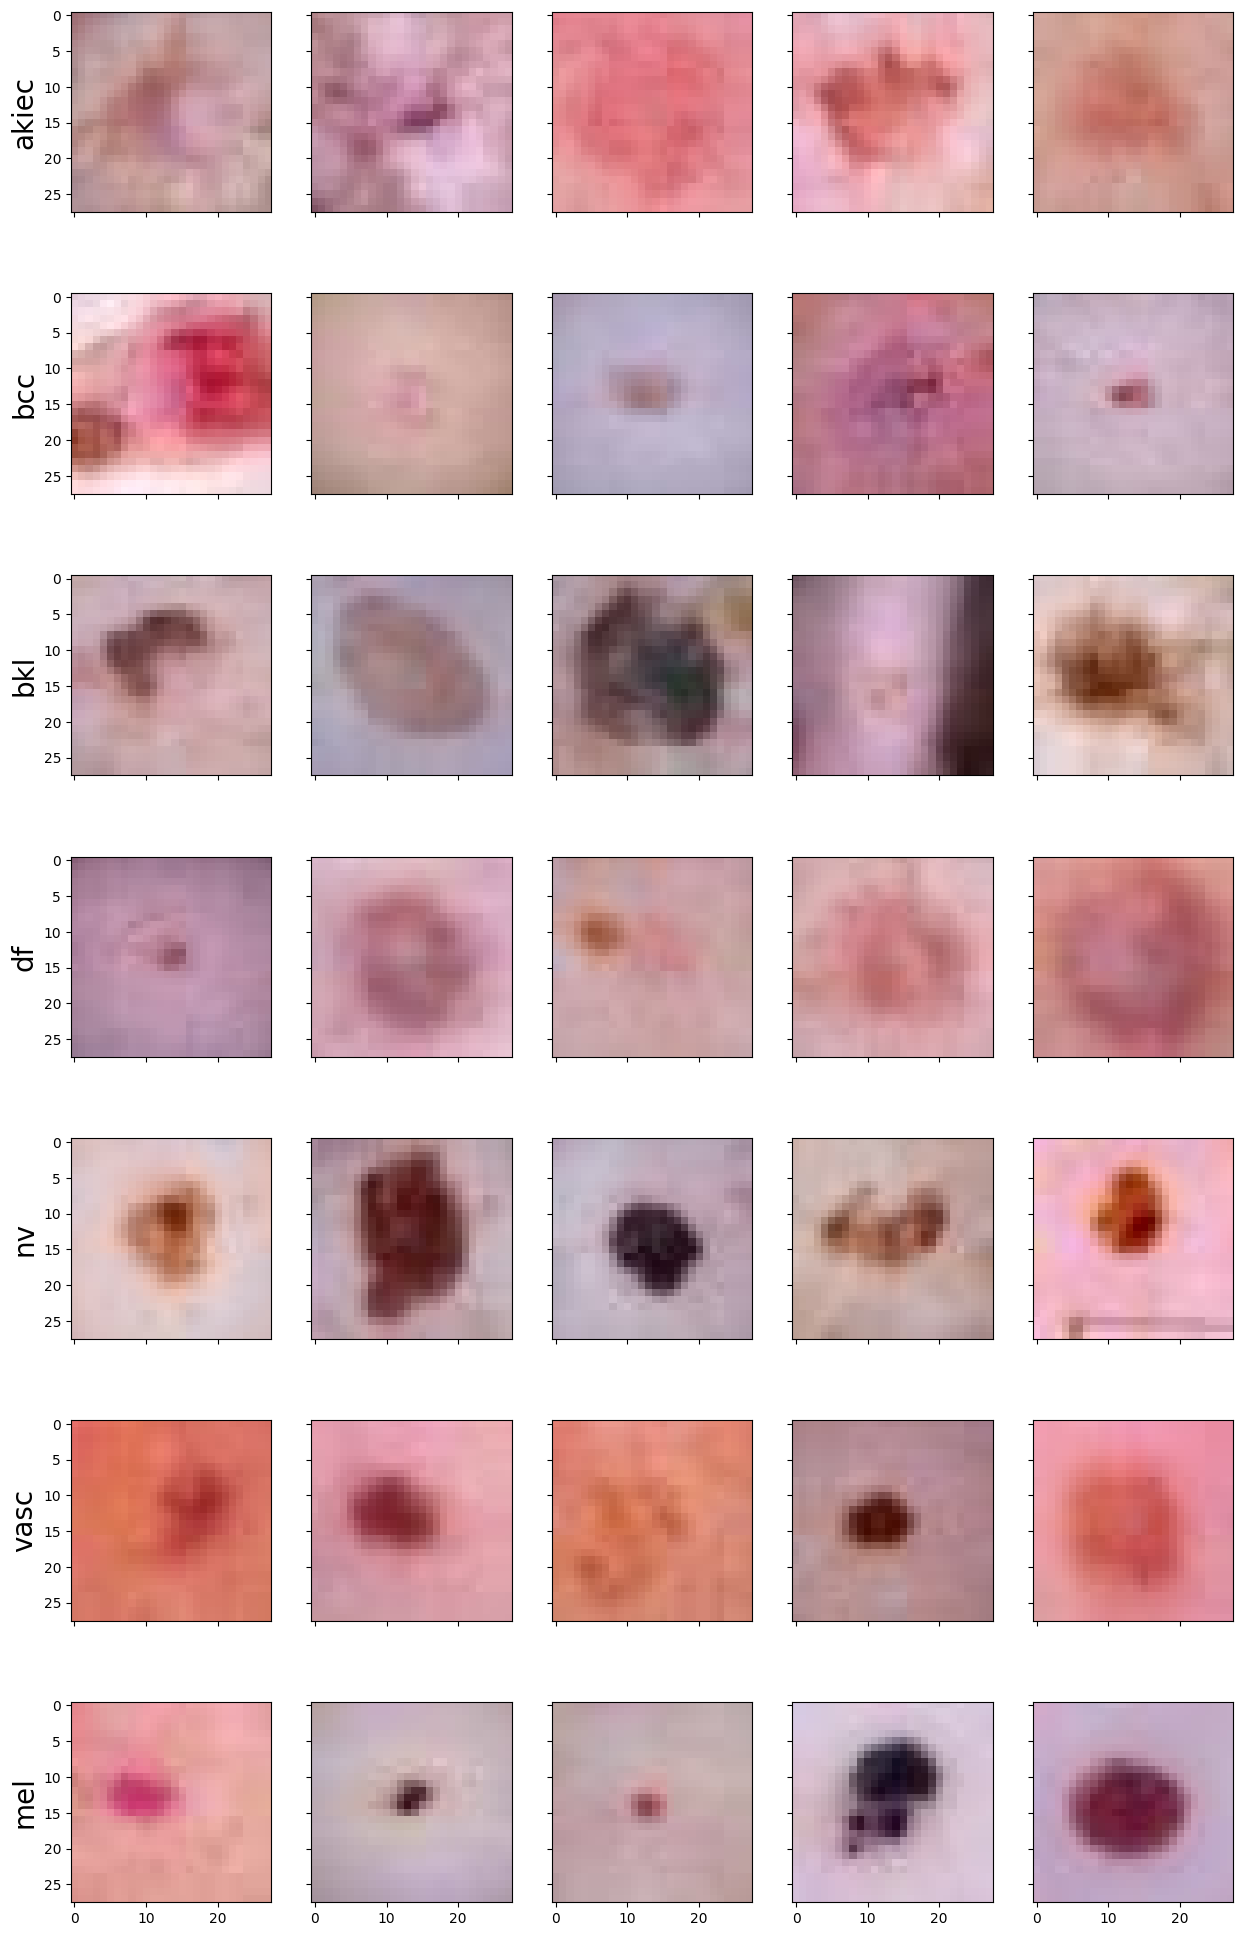

In [10]:
fig, ax = plt.subplots(7, 5)
fig.set_figheight(25)
fig.set_figwidth(15)
for classes in range (7):
  for i, inx in enumerate(np.where(y==classes)[0][:5]):
    ax[classes,i].imshow(X[inx])
    ax[classes,i].set_ylabel(labels[classes],fontsize = 20.0)
    ax[classes,i].label_outer()

In [11]:
num_classes = []
for i in range(len(labels)):
  num_classes.append(len(np.where(y_train==i)[0]))

pd.DataFrame(num_classes,index=labels)


,0
akiec,228
bcc,359
bkl,769
df,80
nv,779
vasc,4693
mel,99


In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

os_dict = {0: num_classes[0]*7,
           1: num_classes[1]*5,
           2: 1500,
           3: 2500,
           4: 1500,
           5: num_classes[5],
           6: 1500}
oversample = RandomOverSampler(sampling_strategy=os_dict)
oversampled_X , oversampled_y = oversample.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)
print('OS_X:%s OS_y:%s' %(oversampled_X.shape, oversampled_y.shape))

us_dict = {0: num_classes[0]*7,
           1: num_classes[1]*5,
           2: 1500,
           3: 2500,
           4: 1500,
           5: 3000,
           6: 1500}

undersample = RandomUnderSampler(sampling_strategy=us_dict)
undersampled_X , undersampled_y = undersample.fit_resample(oversampled_X, oversampled_y)
print('US_X:%s US_y:%s' %(undersampled_X.shape, undersampled_y.shape))

OS_X:(15084, 2352) OS_y:(15084,)
US_X:(13391, 2352) US_y:(13391,)


In [13]:
undersampled_y.shape

(13391,)

In [14]:
undersampled_X = undersampled_X.reshape(-1,28,28,3)

In [15]:
num_classes = []
for i in range(len(labels)):
  num_classes.append(len(np.where(undersampled_y==i)[0]))

pd.DataFrame(num_classes,index=labels)

,0
akiec,1596
bcc,1795
bkl,1500
df,2500
nv,1500
vasc,3000
mel,1500


In [16]:
from tensorflow.keras.utils import to_categorical
undersampled_y = to_categorical(undersampled_y)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [17]:
undersampled_y.shape

(13391, 7)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'wrap')

batch_size=50
train_data = train_datagen.flow(undersampled_X, undersampled_y, batch_size = batch_size, seed=1)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_data = test_datagen.flow(X_val, y_val, batch_size=batch_size,seed=1)

In [19]:
print(f'Train Set:      X:%s Y:%s' %(train_data.x.shape, train_data.y.shape))
print(f'Validation Set: X:%s Y:%s' %(val_data.x.shape, val_data.y.shape))
print(f'Test Set :      X:%s Y:%s' %(X_test.shape, y_test.shape))

Train Set:      X:(13391, 28, 28, 3) Y:(13391, 7)
Validation Set: X:(1003, 28, 28, 3) Y:(1003, 7)
Test Set :      X:(2005, 28, 28, 3) Y:(2005, 7)


In [20]:
num_classes = []
for i in range(len(labels)):
  num_classes.append(len(np.where(np.argmax(val_data.y, axis=1)==i)[0]))

pd.DataFrame(num_classes,index=labels)


,0
akiec,33
bcc,52
bkl,110
df,12
nv,111
vasc,671
mel,14


In [21]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam 

In [22]:
input_layer = Input(shape=(28,28,3))

# convolution block 1 
cb11 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(input_layer)
cb12 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb11)
maxpl1 = MaxPool2D((2,2))(cb12)

#convolution block 2 
cb21 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(maxpl1)
cb22 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb21)
maxpl2 = MaxPool2D((2,2))(cb22)

#convolution block 3
cb31 = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(maxpl2)
cb32 = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb31)
maxpl3 = MaxPool2D((2,2))(cb32)

#convolution block 4
cb41 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(maxpl3)
cb42 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb41)
cb43 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb42)
maxpl4 = MaxPool2D((2,2))(cb43)

# artificial neural network block
flat   = Flatten()(maxpl4)
dense1 = Dense(1024, activation="relu")(flat)
dense2 = Dense(1024, activation="relu")(dense1)
dense3 = Dense(1024, activation="relu")(dense2)
output = Dense(7, activation="softmax")(dense3)
model = Model(inputs=input_layer, outputs=output)

2024-01-05 11:34:01.522101: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-05 11:34:01.650583: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-05 11:34:01.651246: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
batch_size = batch_size
epochs = 30
model_history = model.fit(train_data,
                          steps_per_epoch= int(train_data.n/batch_size),
                          epochs=epochs,
                          validation_data=val_data,
                          validation_steps=int(val_data.n/batch_size))



Epoch 1/30


2024-01-05 11:34:06.017750: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-01-05 11:34:07.273499: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-05 11:34:08.748735: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-05 11:34:08.804401: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f77b001eda0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-05 11:34:08.804418: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 SUPER, Compute Capability 7.5
2024-01-05 11:34:08.817554: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1704447248.913744   19302 device_com

267/267 [==============================] - 24s 54ms/step - loss: 1.7601 - accuracy: 0.2977 - val_loss: 1.2433 - val_accuracy: 0.5920
Epoch 2/30
267/267 [==============================] - 12s 45ms/step - loss: 1.6024 - accuracy: 0.3610 - val_loss: 1.2907 - val_accuracy: 0.5980
Epoch 3/30
267/267 [==============================] - 12s 45ms/step - loss: 1.4930 - accuracy: 0.4102 - val_loss: 1.0759 - val_accuracy: 0.6140
Epoch 4/30
267/267 [==============================] - 12s 45ms/step - loss: 1.3741 - accuracy: 0.4559 - val_loss: 1.0546 - val_accuracy: 0.6030
Epoch 5/30
267/267 [==============================] - 12s 45ms/step - loss: 1.2943 - accuracy: 0.4780 - val_loss: 1.0069 - val_accuracy: 0.6160
Epoch 6/30
267/267 [==============================] - 12s 45ms/step - loss: 1.2205 - accuracy: 0.5072 - val_loss: 1.0777 - val_accuracy: 0.5510
Epoch 7/30
267/267 [==============================] - 12s 45ms/step - loss: 1.1706 - accuracy: 0.5263 - val_loss: 0.9229 - val_accuracy: 0.6540
Epo

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       590080    
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 256)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       590080    
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 256)       590080    
                                                             

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
model.evaluate(X_test/255, y_test)

63/63 [==============================] - 2s 22ms/step - loss: 0.8458 - accuracy: 0.7037


[0.8457908034324646, 0.703740656375885]

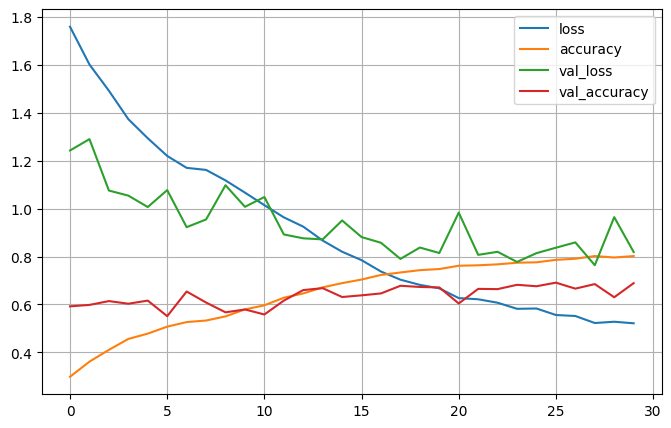

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [29]:
y_proba = model.predict(X_test/255)
y_proba.round(2)

63/63 [==============================] - 1s 9ms/step


array([[0.  , 0.  , 0.01, ..., 0.02, 0.97, 0.  ],
       [0.25, 0.24, 0.03, ..., 0.01, 0.02, 0.  ],
       [0.01, 0.  , 0.84, ..., 0.06, 0.08, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.99, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.02, 0.96, 0.  ]], dtype=float32)

In [30]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred[:10]

array([5, 3, 2, 2, 5, 5, 5, 4, 5, 2])

In [31]:
y_pred_name = np.array(labels)[y_pred]
y_pred_name[:10]

array(['vasc', 'df', 'bkl', 'bkl', 'vasc', 'vasc', 'vasc', 'nv', 'vasc',
       'bkl'], dtype='<U5')

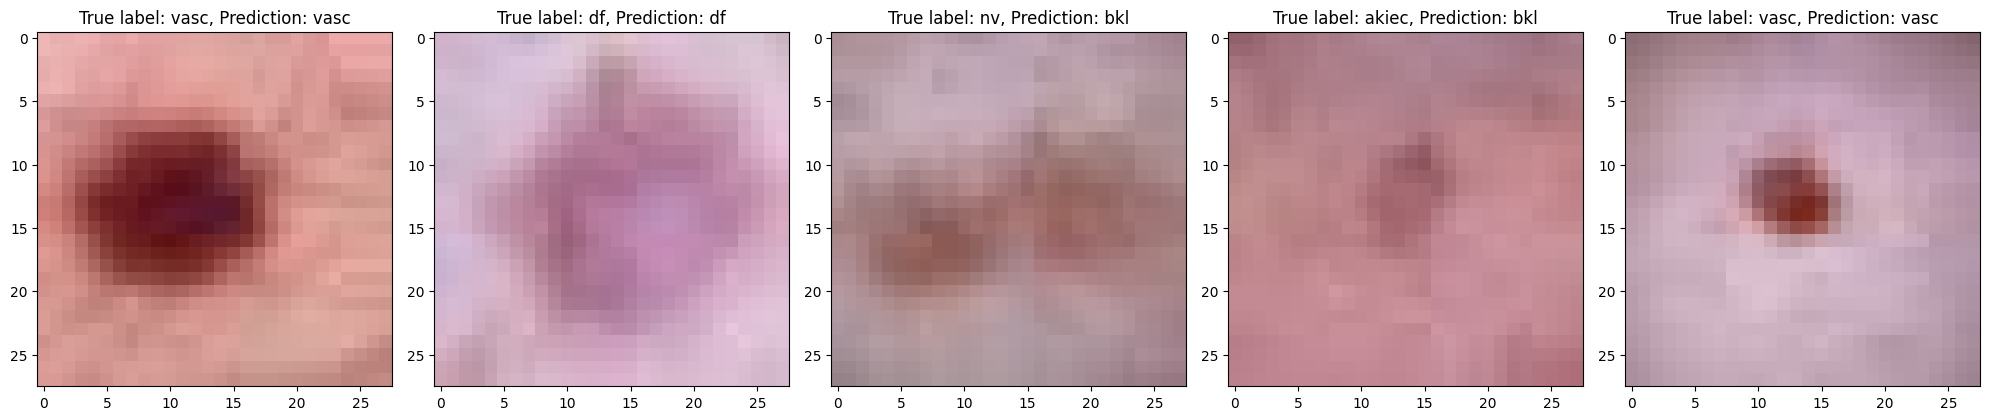

In [32]:
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i])
    plt.title('True label: {}, Prediction: {}'.format(labels[y_test[i].argmax()], y_pred_name[i]))
plt.tight_layout()   

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [34]:
y_test_numbers = np.array([y.argmax() for y in y_test])

In [35]:
cm = confusion_matrix(y_test_numbers, y_pred)

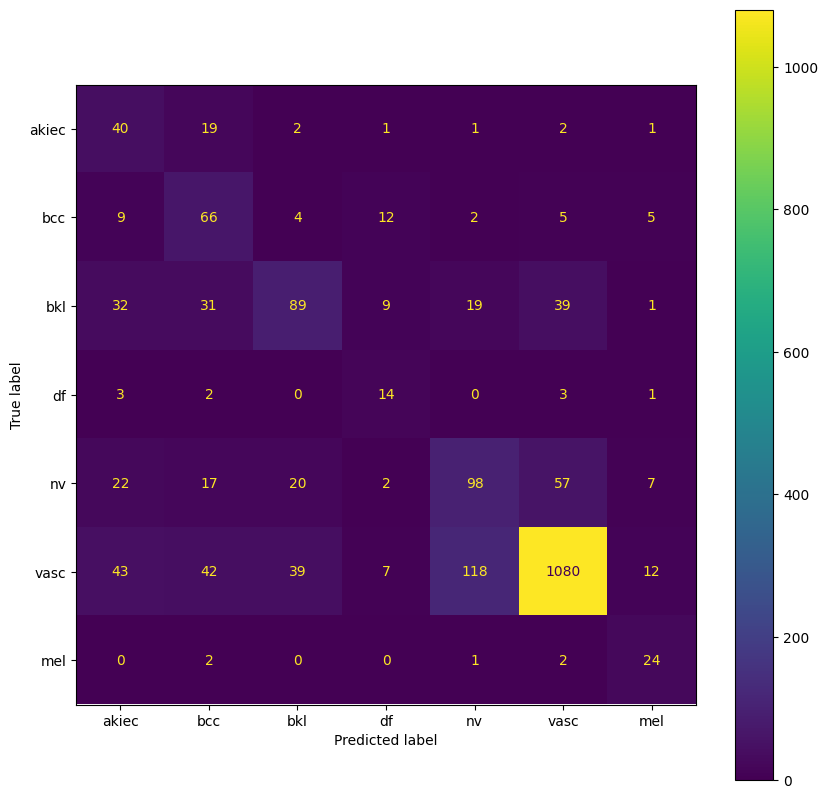

In [36]:
cm_display = ConfusionMatrixDisplay(cm,display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)

In [43]:
model.evaluate(X_test/255, y_test)

63/63 [==============================] - 1s 11ms/step - loss: 0.8458 - accuracy: 0.7037


[0.8457908034324646, 0.703740656375885]

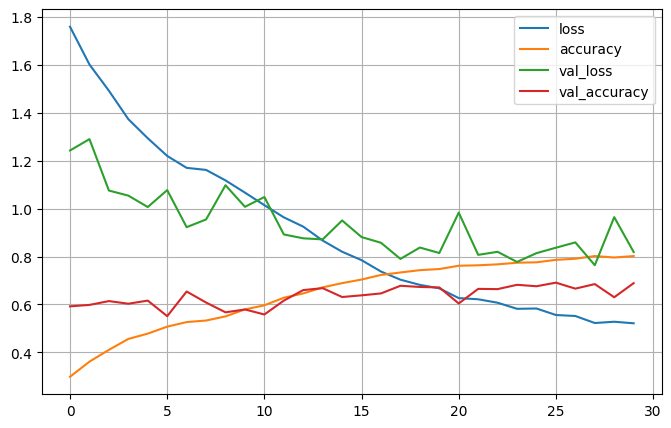

In [44]:


pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()



In [45]:


y_proba = model.predict(X_test/255)
y_proba.round(2)



63/63 [==============================] - 1s 10ms/step


array([[0.  , 0.  , 0.01, ..., 0.02, 0.97, 0.  ],
       [0.25, 0.24, 0.03, ..., 0.01, 0.02, 0.  ],
       [0.01, 0.  , 0.84, ..., 0.06, 0.08, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.99, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.02, 0.96, 0.  ]], dtype=float32)

In [48]:
tf.keras.models.save_model(model, 'softmax_regression_model')

INFO:tensorflow:Assets written to: softmax_regression_model/assets


INFO:tensorflow:Assets written to: softmax_regression_model/assets


In [47]:
!ls softmax_regression_model


assets	fingerprint.pb	saved_model.pb	variables
